# 10장 연습문제 10번 응용

[저자 노트북 10번 문제 참고](https://colab.research.google.com/github/rickiepark/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb#scrollTo=ehaAAVNZwkDR)

10번 문제 풀이를 찬찬히 따라 해본 후 아래 내용을 추가 수행해보십시오.

# 모델 생성 연습

10번 문제 풀이 중 시퀀셜API를 이용한 모델 생성은 아래와 같다.



```
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
```



In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# keras
from tensorflow import keras

## Q1 : 위 모델을 함수형 API를 이용하여 작성해보자.

또한 생성한 모델 정보 관찰, 학습, 평가를 해보자.


```
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
```



In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape[1:]

(28, 28)

In [ ]:
input_ = keras.layers.Input(shape=(X_train.shape[1:]))
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
flatten = keras.layers.Flatten()(concat)
output = keras.layers.Dense(10, activation="softmax")(flatten)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 28, 300)      8700        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 28, 100)      30100       dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 128)      0           input_1[0][0]                    
                                                                 dense_1[0][0]         

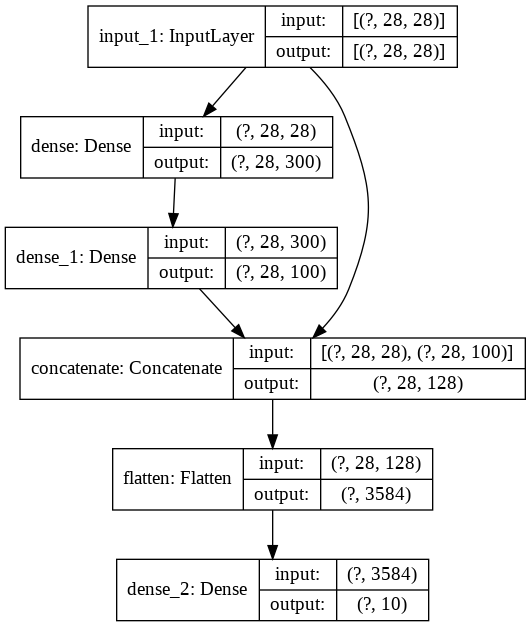

In [ ]:
keras.utils.plot_model(model, "this.png", show_shapes=True)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.7415 - accuracy: 0.7606 - val_loss: 0.5307 - val_accuracy: 0.8234
Epoch 2/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.5118 - accuracy: 0.8219 - val_loss: 0.4652 - val_accuracy: 0.8444
Epoch 3/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4681 - accuracy: 0.8360 - val_loss: 0.4772 - val_accuracy: 0.8274
Epoch 4/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4420 - accuracy: 0.8471 - val_loss: 0.4237 - val_accuracy: 0.8620
Epoch 5/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4241 - accuracy: 0.8529 - val_loss: 0.4035 - val_accuracy: 0.8618
Epoch 6/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4070 - accuracy: 0.8586 - val_loss: 0.3953 - val_accuracy: 0.8672
Epoch 7/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3951 - accuracy: 0.8631 - val_loss: 0.3869 - val_ac

In [ ]:
test = model.evaluate(X_valid, y_valid)
X_new = X_valid[:3]
y_pred = model.predict(X_new)

157/157 [==============================] - 1s 4ms/step - loss: 0.3641 - accuracy: 0.8738


###다른 option의 compile

In [ ]:
input_ = keras.layers.Input(shape=(X_train.shape[1:]))
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
flatten = keras.layers.Flatten()(concat)
output = keras.layers.Dense(10, activation="softmax")(flatten)

model = keras.models.Model(inputs=[input_], outputs=[output])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10)

Epoch 1/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4387 - accuracy: 0.8438 - val_loss: 0.3438 - val_accuracy: 0.8744
Epoch 2/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3319 - accuracy: 0.8803 - val_loss: 0.3384 - val_accuracy: 0.8800
Epoch 3/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3017 - accuracy: 0.8899 - val_loss: 0.3119 - val_accuracy: 0.8896
Epoch 4/10
1719/1719 [==============================] - 16s 10ms/step - loss: 0.2794 - accuracy: 0.8991 - val_loss: 0.2939 - val_accuracy: 0.8988
Epoch 5/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2624 - accuracy: 0.9041 - val_loss: 0.2899 - val_accuracy: 0.8984
Epoch 6/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2467 - accuracy: 0.9094 - val_loss: 0.3016 - val_accuracy: 0.8964
Epoch 7/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2354 - accuracy: 0.9139 - val_loss: 0.2928 - val_a

## Q2: 위 모델을 서브클래싱 API를 이용하여 작성해보자.

또한 생성한 모델 정보 관찰, 학습, 평가를 해보자.

In [ ]:
class SubModel(keras.models.Model):
    def __init__(self, units=300, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(100, activation=activation)
        self.flatten = keras.layers.Flatten()
        self.model_output = keras.layers.Dense(10, activation="softmax")
        
    def call(self, inputs):
        inputs_ = inputs
        hidden1 = self.hidden1(inputs_)
        hidden2 = self.hidden2(hidden1)
        flatten = self.flatten(hidden2)
        model_output = self.model_output(flatten)
        return model_output

sub_model = SubModel(300, activation="relu")

In [ ]:
sub_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = sub_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4493 - accuracy: 0.8395 - val_loss: 0.3389 - val_accuracy: 0.8774
Epoch 2/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3368 - accuracy: 0.8783 - val_loss: 0.3233 - val_accuracy: 0.8860
Epoch 3/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3038 - accuracy: 0.8887 - val_loss: 0.3148 - val_accuracy: 0.8840
Epoch 4/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2806 - accuracy: 0.8981 - val_loss: 0.2927 - val_accuracy: 0.8940
Epoch 5/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2638 - accuracy: 0.9038 - val_loss: 0.2814 - val_accuracy: 0.9002
Epoch 6/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2461 - accuracy: 0.9094 - val_loss: 0.2967 - val_accuracy: 0.8950
Epoch 7/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2359 - accuracy: 0.9127 - val_loss: 0.2882 - val_ac

# 콜백 이용 연습

## Q3: 시퀀셜 API로 생성한 모델에 대해, 학습시 ``ModelCheckpoint`` 콜백을 작성하여 모델을 저장해보자.

스펙
- 검증 로스 기준으로 베스트 갱신 마다 저장되게 하자.
- 모델명은 ./my_models/mnist_q3_model_epoch_05_val_loss_0.07.h5 처럼 에포크와 검증 로스가 포함되도록 해보자.

In [ ]:
!pip install -q pyyaml h5py

In [ ]:
!rm -r ./my_models

In [ ]:
!mkdir -p my_models

In [ ]:
checkpoint_path = "./my_models/mnist_q3_model_epoch_{epoch:02d}_val_loss_{val_loss:.2f}.h5"

In [ ]:
input_ = keras.layers.Input(shape=(X_train.shape[1:]))
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
flatten = keras.layers.Flatten()(concat)
output = keras.layers.Dense(10, activation="softmax")(flatten)

model = keras.models.Model(inputs=[input_], outputs=[output])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

checkpoint_cb = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4397 - acc: 0.8439 - val_loss: 0.3418 - val_acc: 0.8796
Epoch 2/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3350 - acc: 0.8793 - val_loss: 0.3335 - val_acc: 0.8796
Epoch 3/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.3038 - acc: 0.8890 - val_loss: 0.3133 - val_acc: 0.8908
Epoch 4/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2797 - acc: 0.8990 - val_loss: 0.2901 - val_acc: 0.8982
Epoch 5/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2631 - acc: 0.9039 - val_loss: 0.2859 - val_acc: 0.9010
Epoch 6/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2459 - acc: 0.9112 - val_loss: 0.2941 - val_acc: 0.8988
Epoch 7/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2356 - acc: 0.9137 - val_loss: 0.2942 - val_acc: 0.8986
Epoch 8/10
1719/1719 [==============================] 

In [ ]:
!ls ./my_models/

mnist_q3_model_epoch_01_val_loss_0.34.h5
mnist_q3_model_epoch_02_val_loss_0.33.h5
mnist_q3_model_epoch_03_val_loss_0.31.h5
mnist_q3_model_epoch_04_val_loss_0.29.h5
mnist_q3_model_epoch_05_val_loss_0.29.h5


## Q4: 위와 동일하지만 다음 스펙으로 ModelCheckpoint 콜백을 작성하여 모델을 저장해보자.

스펙
- 검증 accurcy 기준으로 베스트 갱신 마다 저장되게하자.
- 모델명은 ./my_models/mnist_q4_model_epoch_05_val_accuracy_0.97.h5 처럼 에프코와 검증 accuracy가 포함되도록 해보자.

In [ ]:
checkpoint_path = "./my_models/mnist_q4_model_epoch_{epoch:02d}_val_accuracy_{val_acc:.2f}.h5"

In [ ]:
input_ = keras.layers.Input(shape=(X_train.shape[1:]))
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
flatten = keras.layers.Flatten()(concat)
output = keras.layers.Dense(10, activation="softmax")(flatten)

model = keras.models.Model(inputs=[input_], outputs=[output])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

checkpoint_cb = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_acc', save_best_only=True, mode='auto')
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4431 - acc: 0.8418 - val_loss: 0.3413 - val_acc: 0.8786
Epoch 2/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3346 - acc: 0.8792 - val_loss: 0.3360 - val_acc: 0.8786
Epoch 3/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3041 - acc: 0.8887 - val_loss: 0.3240 - val_acc: 0.8872
Epoch 4/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2811 - acc: 0.8992 - val_loss: 0.2957 - val_acc: 0.8938
Epoch 5/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2643 - acc: 0.9032 - val_loss: 0.2877 - val_acc: 0.8984
Epoch 6/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2465 - acc: 0.9097 - val_loss: 0.2993 - val_acc: 0.8970
Epoch 7/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2353 - acc: 0.9129 - val_loss: 0.2946 - val_acc: 0.8964
Epoch 8/10
1719/1719 [==============================] -

In [ ]:
!ls ./my_models/

mnist_q3_model_epoch_01_val_loss_0.34.h5
mnist_q3_model_epoch_02_val_loss_0.33.h5
mnist_q3_model_epoch_03_val_loss_0.31.h5
mnist_q3_model_epoch_04_val_loss_0.29.h5
mnist_q3_model_epoch_05_val_loss_0.29.h5
mnist_q4_model_epoch_01_val_accuracy_0.88.h5
mnist_q4_model_epoch_03_val_accuracy_0.89.h5
mnist_q4_model_epoch_04_val_accuracy_0.89.h5
mnist_q4_model_epoch_05_val_accuracy_0.90.h5
mnist_q4_model_epoch_09_val_accuracy_0.90.h5
